In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow_hub as hub

# To Avoid GPU errors
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
# ================================================ #
#               1. Pretrained-Model                #
# ================================================ #

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

model = keras.models.load_model("pretrained/")

# Freeze all model layer weights
model.trainable = False

# Can also set trainable for specific layers
for layer in model.layers:
    # assert should be true because of one-liner above
    assert layer.trainable == False
    layer.trainable = False

print(model.summary())  # for finding base input and output
base_inputs = model.layers[0].input  # input for the first layer
base_output = model.layers[-2].output # output from the 2nd last layer(just last ki dense layer leave kiya)
output = layers.Dense(10)(base_output) # define new final output layer, having 10 classes as output of it and base_output(output of n-1 layers of pretrained model) as input of it
new_model = keras.Model(base_inputs, output) # new model with input ad output layers

# This model is actually identical to model we
# loaded (this is just for demonstration and
# and not something you would do in practice).
print(new_model.summary()) # exact same model, just final output layer me number of classes changed

# As usual we do compile and fit, this time on new_model
new_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

new_model.fit(x_train, y_train, batch_size=32, epochs=3, verbose=2)


In [2]:
# =================================================== #
#             2. Pretrained Keras Model               #
# =================================================== #


In [3]:
# Random data for demonstration (3 examples w. 3 classes)(not accurate remember)
x = tf.random.normal(shape=(3, 299, 299, 3))

This line of code generates a tensor of random values with a normal (Gaussian) distribution using TensorFlow. Here's what each part does:

- `tf`: This is an alias for TensorFlow, indicating that you're using TensorFlow library functions.
- `random.normal`: This is a function from TensorFlow's random module that generates random numbers from a normal distribution.
- `shape=(3, 299, 299, 3)`: This parameter specifies the shape of the tensor to be generated. In this case, it creates a 4-dimensional tensor with a shape of (3, 299, 299, 3). This means:
  - The first dimension has a size of 3.
  - The second and third dimensions have a size of 299 each.
  - The fourth dimension has a size of 3.
- Overall, the generated tensor represents a batch of 3 images with dimensions 299x299 pixels, each having 3 color channels (RGB). The values in the tensor are random, drawn from a normal distribution with a mean of 0 and a standard deviation of 1.

In [4]:
x

<tf.Tensor: shape=(3, 299, 299, 3), dtype=float32, numpy=
array([[[[ 1.21947527e-01, -1.30896842e+00, -2.16353202e+00],
         [ 9.02441740e-01,  1.82973146e+00,  6.87909067e-01],
         [-3.57160270e-02, -4.44995284e-01,  8.72292936e-01],
         ...,
         [-1.50193334e-01,  6.34976685e-01, -4.40940142e-01],
         [ 9.47281003e-01,  8.91860485e-01, -4.31004196e-01],
         [-1.66190937e-01, -9.89525616e-01, -2.16263384e-01]],

        [[ 1.41644299e+00, -1.41906428e+00, -5.88010013e-01],
         [ 6.72806948e-02,  8.51024270e-01, -2.85412908e-01],
         [-1.33561969e+00,  1.65942359e+00,  3.06150079e-01],
         ...,
         [-2.17128932e-01,  3.46165180e-01,  5.32981813e-01],
         [ 9.78002846e-02,  6.20180786e-01, -6.19924545e-01],
         [-9.76089358e-01, -6.83325350e-01,  9.43137407e-01]],

        [[ 4.01007652e-01, -2.15558505e+00, -1.16236797e-02],
         [-1.17864788e+00, -4.33625430e-01,  2.91196406e-01],
         [ 5.81649095e-02,  1.45614600e+00

In [5]:
y = tf.constant([0, 1, 2])

This line of code creates a TensorFlow constant tensor `y` containing the values `[0, 1, 2]`. Here's what each part does:

- `tf`: As before, this is the alias for TensorFlow.
- `constant`: This is a function from TensorFlow that creates a constant tensor with the provided values.
- `[0, 1, 2]`: These are the values of the tensor. In this case, it's a 1-dimensional tensor containing the integers 0, 1, and 2.

So, `y` is a TensorFlow tensor representing a 1-dimensional array with three elements: 0, 1, and 2.

In [6]:
y

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 1, 2], dtype=int32)>

In [7]:
model  = keras.applications.InceptionV3(include_top=True)

96112376/96112376 [==============================] - 1s 0us/step


This line of code creates an instance of the InceptionV3 model using Keras, a high-level neural networks API running on top of TensorFlow. Let's break it down:

- `keras`: This is the module containing Keras functionality.
- `applications`: This submodule contains pre-trained models for various tasks.
- `InceptionV3`: This is a function from Keras that instantiates the InceptionV3 model architecture.
- `include_top=True`: This parameter determines whether to include the fully-connected layers at the top of the network. When `include_top=True`, the entire model, including the classification layers, is included. When `include_top=False`, only the convolutional base of the model is loaded, excluding the top classification layers.

So, in this case, `model` will be an instance of the InceptionV3 model with its fully-connected layers included, ready to be used for tasks such as image classification.

In [8]:
print(model.summary())

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalizati

In [9]:
base_inputs = model.layers[0].input # input of very first layer, is now in base_input
base_outputs = model.layers[-2].output # just excluding the last dense layer, output of the 2nd last layer is base_outputs

final_outputs = layers.Dense(3)(base_outputs) # since we have only 3 classes
new_model = keras.Model(inputs=base_inputs, outputs=final_outputs)

In [11]:
new_model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ["accuracy"]
)

Setting `from_logits=True` in `SparseCategoricalCrossentropy` means that the loss function expects the model's output to be raw logits, rather than probabilities. Let me explain in detail:

When you train a neural network for classification, the final layer typically produces a set of raw scores, often called logits. These scores are then transformed into probabilities using a softmax function, which ensures that they sum up to 1 and are in the range [0, 1]. These probabilities represent the model's confidence or belief in each class.

However, during training, it's often more numerically stable and efficient to work directly with logits before applying the softmax function. Therefore, the `SparseCategoricalCrossentropy` loss function provides the option `from_logits=True` to indicate that the input values are raw logits.

When `from_logits=True`, the loss function internally applies the softmax function to the model's output before computing the cross-entropy loss. This ensures numerical stability and avoids potential issues like underflow or overflow when dealing with very small or very large probabilities.

In summary, setting `from_logits=True` tells the loss function that the model's output is raw logits, and it internally applies the softmax function to compute the cross-entropy loss.

In [12]:
new_model.fit(x,y,epochs=15,verbose=2) # fitting on the random datapoints

Epoch 1/15
1/1 - 29s - loss: 0.9780 - accuracy: 0.6667 - 29s/epoch - 29s/step
Epoch 2/15
1/1 - 2s - loss: 0.0423 - accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 3/15
1/1 - 3s - loss: 1.5298e-05 - accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 4/15
1/1 - 2s - loss: 2.1060e-06 - accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 5/15
1/1 - 2s - loss: 5.5631e-07 - accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 6/15
1/1 - 2s - loss: 2.7815e-07 - accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 7/15
1/1 - 2s - loss: 7.9473e-08 - accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 8/15
1/1 - 3s - loss: 7.9473e-08 - accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 9/15
1/1 - 2s - loss: 3.9736e-08 - accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 10/15
1/1 - 2s - loss: 3.9736e-08 - accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 11/15
1/1 - 2s - loss: 0.0000e+00 - accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 12/15
1/1 - 2s - loss: 0.0000e+00 - accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 13/15
1/1 - 3s - loss: 0.0000e+00 - accuracy: 1.

In [13]:
# ================================================= #
#             3. Pretrained Hub Model               #
# ================================================= #

In [14]:
# Random data for demonstration (3 examples w. 3 classes)
x = tf.random.normal(shape=(3, 299, 299, 3))
y = tf.constant([0, 1, 2])

url = "https://www.kaggle.com/models/google/inception-v3/frameworks/TensorFlow2/variations/classification/versions/2"

base_model = hub.KerasLayer(url, input_shape=(299, 299, 3))
base_model.trainable = False # for freezing the weights of pretrained layers, only extra layers that we add will be updated(means only their weights will be updated)

Just url of most of the tensorflow hub models has been changed to kaggle format. Just look once.

Setting `base_model.trainable = False` means that the parameters (weights) of the `base_model`, typically the pre-trained layers, will not be updated during the training process. Let's break it down:

- `base_model`: This typically refers to a pre-trained model, such as the one you instantiated earlier (`InceptionV3` in your case).
- `trainable`: This is an attribute of Keras models that determines whether the weights of the model should be updated during training.

When you set `base_model.trainable = False`:

1. It freezes the weights of the pre-trained layers, meaning they remain fixed and won't be updated during training. This is useful when you want to use the pre-trained model as a feature extractor or when you have limited training data and want to prevent overfitting.
  
2. Only the weights of the additional layers you add on top of the pre-trained model will be trained during the training process.

By doing this, you can leverage the knowledge learned by the pre-trained model on a large dataset while adapting it to your specific task without risking to overwrite the valuable pre-trained weights.

In [17]:
model = keras.Sequential([
    base_model,
    layers.Dense(128,activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(5),
])

In [18]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [19]:
model.fit(x,y,batch_size=32,epochs=15,verbose=2)

Epoch 1/15
1/1 - 7s - loss: 1.4881 - accuracy: 0.3333 - 7s/epoch - 7s/step
Epoch 2/15
1/1 - 1s - loss: 0.9432 - accuracy: 0.3333 - 720ms/epoch - 720ms/step
Epoch 3/15
1/1 - 1s - loss: 0.8581 - accuracy: 0.6667 - 853ms/epoch - 853ms/step
Epoch 4/15
1/1 - 1s - loss: 0.6921 - accuracy: 1.0000 - 526ms/epoch - 526ms/step
Epoch 5/15
1/1 - 1s - loss: 0.6251 - accuracy: 1.0000 - 537ms/epoch - 537ms/step
Epoch 6/15
1/1 - 1s - loss: 0.5014 - accuracy: 1.0000 - 523ms/epoch - 523ms/step
Epoch 7/15
1/1 - 1s - loss: 0.4170 - accuracy: 1.0000 - 551ms/epoch - 551ms/step
Epoch 8/15
1/1 - 1s - loss: 0.3487 - accuracy: 1.0000 - 529ms/epoch - 529ms/step
Epoch 9/15
1/1 - 1s - loss: 0.2742 - accuracy: 1.0000 - 543ms/epoch - 543ms/step
Epoch 10/15
1/1 - 1s - loss: 0.2200 - accuracy: 1.0000 - 534ms/epoch - 534ms/step
Epoch 11/15
1/1 - 1s - loss: 0.1840 - accuracy: 1.0000 - 539ms/epoch - 539ms/step
Epoch 12/15
1/1 - 1s - loss: 0.1502 - accuracy: 1.0000 - 529ms/epoch - 529ms/step
Epoch 13/15
1/1 - 1s - loss: 0.

#**12. Tensorflow Datasets**

Keras have relatively less datasets

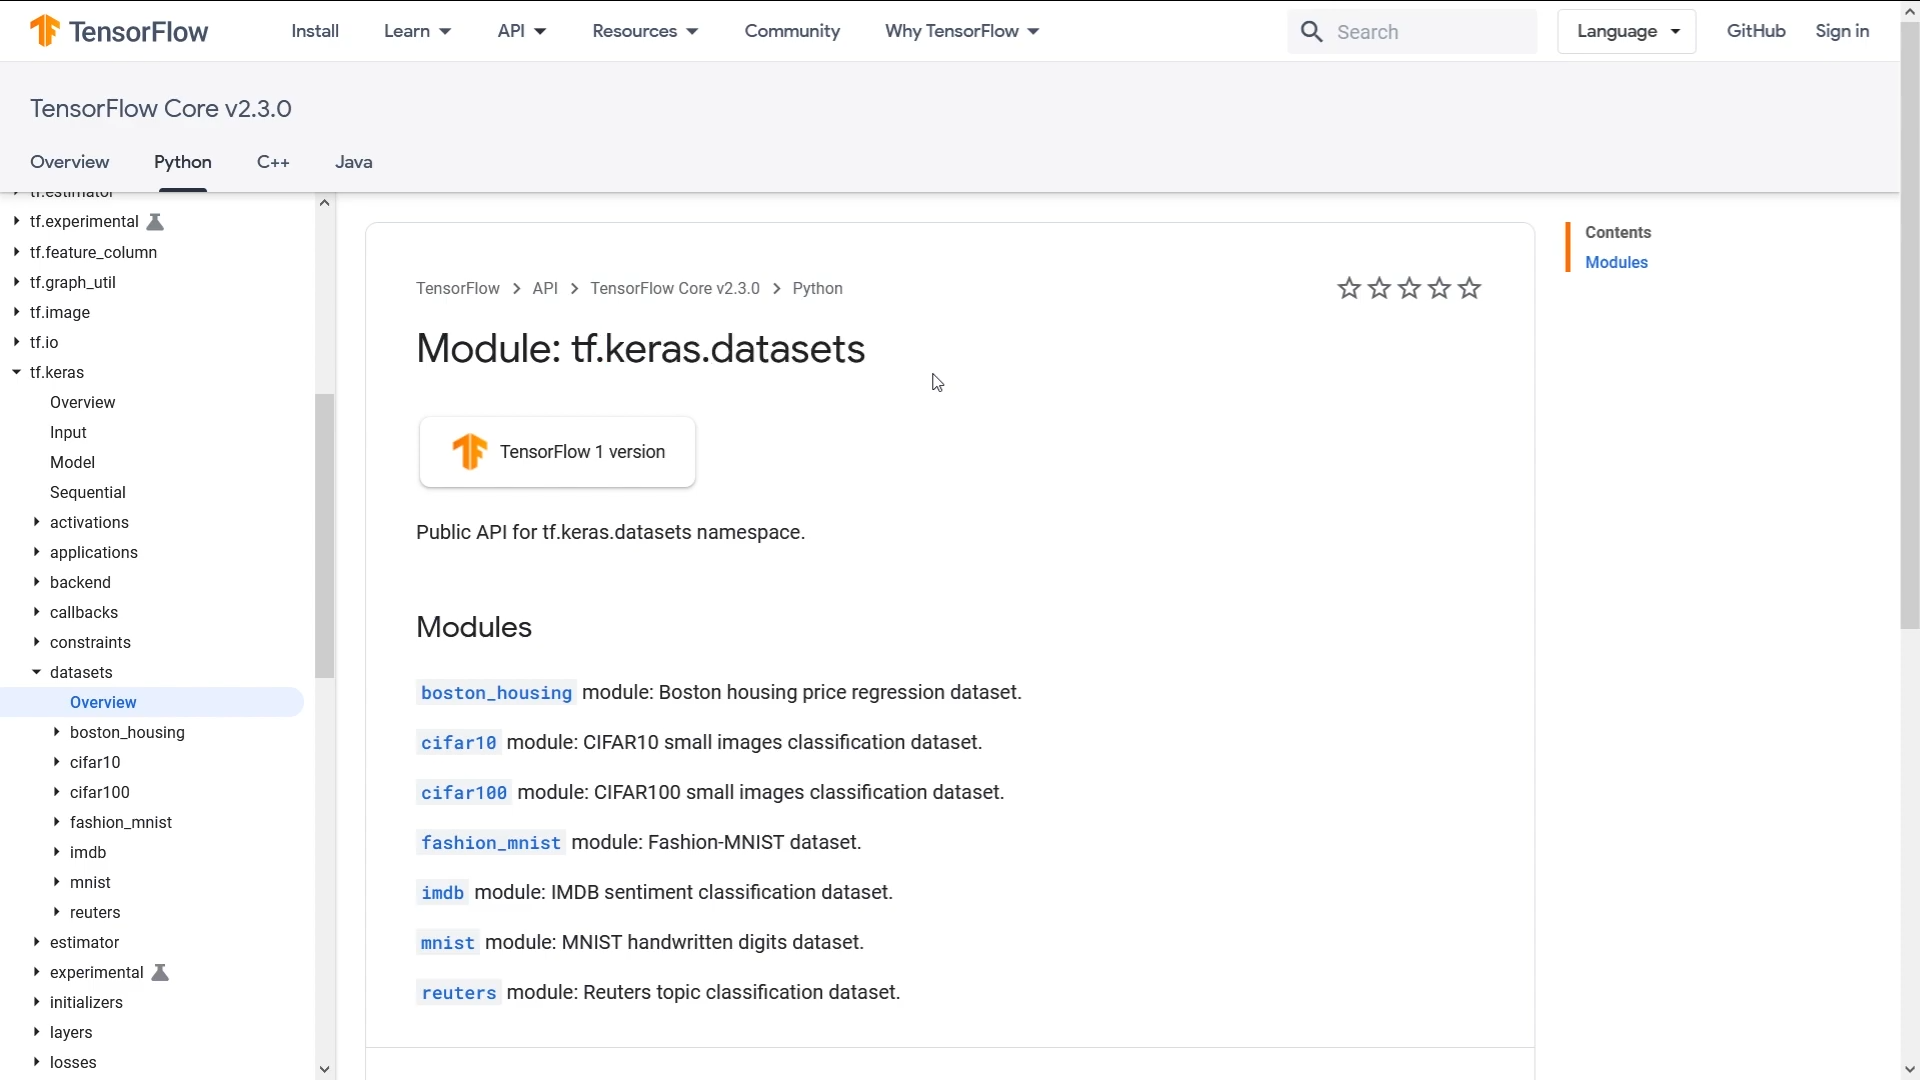

At the same time, tensorflow has a lot of datasets, Infact it has many categories of datasets and inside each categories a lot of datasets it has. Categories example : object_detection, image, image_classification, translate, audio and many more.

Both Keras and TensorFlow provide access to various datasets, but they differ in terms of how datasets are managed and provided.

1. **Keras**:
    - Keras, being a high-level neural networks API, offers a simpler interface for working with datasets. It includes utilities to load and preprocess popular datasets such as MNIST, CIFAR-10, CIFAR-100, and more.
    - These datasets are typically available through the `keras.datasets` module and can be easily loaded using functions like `load_data()`.

2. **TensorFlow**:
    - TensorFlow provides more extensive support for datasets, including built-in datasets as well as tools for creating custom datasets.
    - TensorFlow Datasets (`tfds`) is a collection of ready-to-use datasets available through the `tensorflow_datasets` module. It offers a wide range of datasets for various machine learning tasks, including image classification, text classification, object detection, and more.
    - TensorFlow also provides tools like `tf.data.Dataset` API, which allows users to create and manipulate datasets efficiently. This API provides a flexible way to work with large datasets, perform transformations, and feed data into TensorFlow models.

In summary, while Keras offers a convenient interface for working with common datasets, TensorFlow provides a more comprehensive set of tools for managing datasets, including both built-in datasets and utilities for creating custom datasets.

In [8]:
import matplotlib.pyplot
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_datasets as tfds # new import, to use tensorflow datasets

In [9]:
physical_devices = tf.config.list_physical_devices("GPU")

if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0],True)
else:
  print("Using CPU")

Using CPU


In [10]:
# loading mnist dataset from tensorflow_datasets
(ds_train,ds_test), ds_info = tfds.load(
    "mnist",
    split=["train","test"], # mnist does not provide validation, for some other dataset ["train","validation","test"]
    shuffle_files=True,
    as_supervised=True,# taki return tuple (img,label); otherwise it return dictionary
    with_info=True, # to get info
)

This code loads the MNIST dataset using TensorFlow Datasets (`tfds`). Let's go through each parameter:

- `("mnist")`: This specifies the name of the dataset to load, in this case, "mnist". TensorFlow Datasets provides a wide range of datasets, and "mnist" refers to the MNIST dataset, a popular dataset of handwritten digits.
  
- `split=["train","test"]`: This parameter specifies the splits of the dataset to load. In this case, it loads both the training and test splits of the MNIST dataset. Some datasets may also provide additional splits like validation, but MNIST only provides training and test splits.
  
- `shuffle_files=True`: This parameter indicates whether to shuffle the files within the dataset. Shuffling the files can be useful for ensuring randomness and preventing any bias that might arise from the order of the data.
  
- `as_supervised=True`: This parameter specifies whether to load the dataset in a supervised format. When `as_supervised=True`, TensorFlow Datasets loads the data as tuples of (image, label) pairs, where "image" represents the input data (e.g., an image) and "label" represents the corresponding label or category. This format is suitable for tasks like classification.
  
- `with_info=True`: This parameter indicates whether to also return information about the dataset, such as its size, shape, and other metadata. When `with_info=True`, the `tfds.load()` function returns a tuple `(dataset, dataset_info)`, where `dataset_info` contains information about the loaded dataset. In this case, `ds_info` will contain information about the MNIST dataset.

Overall, this code loads the MNIST dataset, both training and test splits, shuffling the files, loading it in a supervised format, and also providing information about the dataset.

In [11]:
print(ds_info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


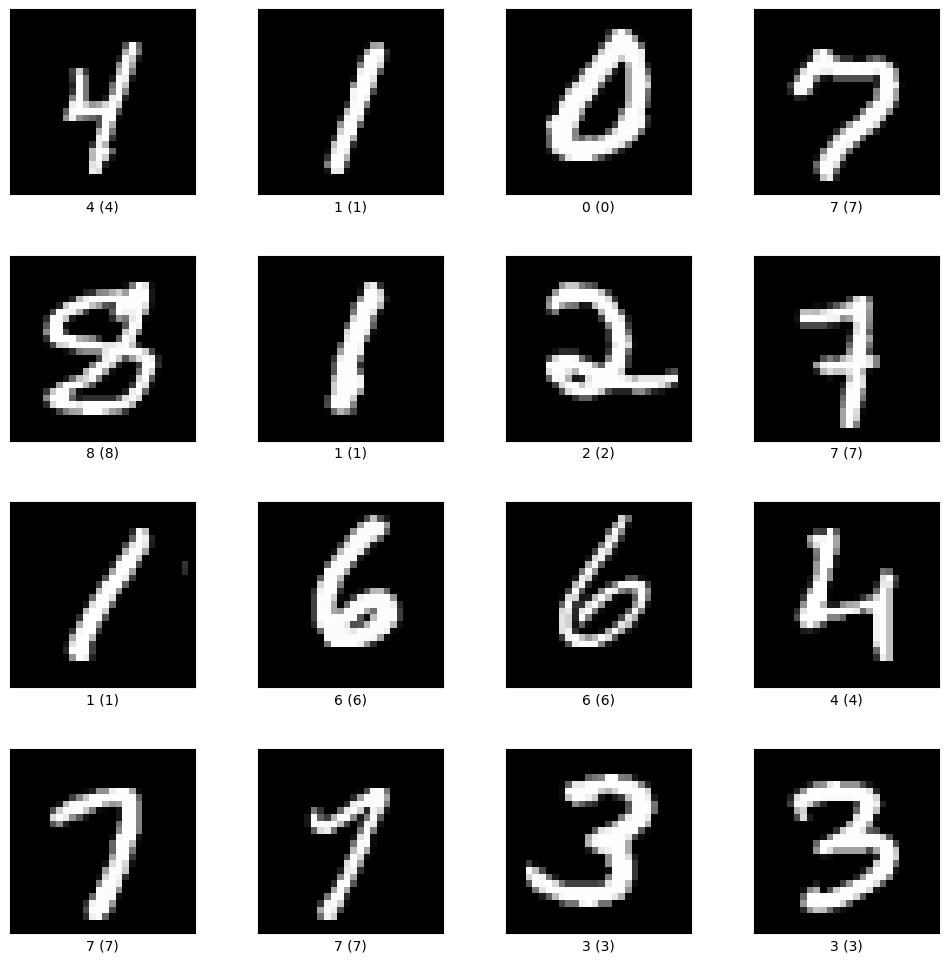

In [12]:
fig = tfds.show_examples(ds_train, ds_info, rows=4, cols=4)

In [13]:
def normalize_img(image, label):
  # normalize images
  return tf.cast(image, tf.float32)/255.0, label

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 64
ds_train = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits["train"].num_examples)
ds_train = ds_train.batch(BATCH_SIZE)
ds_train = ds_train.prefetch(AUTOTUNE)

In [15]:
ds_test = ds_test.map(normalize_img, num_parallel_calls = AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.prefetch(AUTOTUNE)

Sure, let's break down the code:

1. **`normalize_img` function**:
    - This function takes an image and its corresponding label as input.
    - It casts the image to `tf.float32` and then divides by 255.0 to normalize the pixel values to the range [0, 1].
    - Finally, it returns the normalized image and the original label.

2. **`AUTOTUNE` constant**:
    - `AUTOTUNE` is a special value used with TensorFlow's `tf.data` API to automatically determine the number of parallel calls during data preprocessing. It allows TensorFlow to optimize performance by dynamically adjusting the degree of parallelism based on available computational resources.

3. **`BATCH_SIZE` constant**:
    - This specifies the batch size to use during training. Batch size determines the number of samples processed before the model's parameters are updated.

4. **`ds_train` pipeline**:
    - `ds_train = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)`: This line applies the `normalize_img` function to each element (image, label) in the training dataset (`ds_train`). It does this in parallel (`num_parallel_calls=AUTOTUNE`) to utilize multiple CPU cores for faster preprocessing.
    - `ds_train = ds_train.cache()`: This line caches the preprocessed data in memory, which can speed up subsequent epochs of training by avoiding redundant preprocessing.
    - `ds_train = ds_train.shuffle(ds_info.splits["train"].num_examples)`: This line shuffles the training dataset to introduce randomness into the order of the samples. It shuffles the entire dataset, with the size of the shuffle buffer being the total number of examples in the training split.
    - `ds_train = ds_train.batch(BATCH_SIZE)`: This line batches the preprocessed data into batches of size `BATCH_SIZE`, which is useful for efficient training with mini-batch gradient descent.
    - `ds_train = ds_train.prefetch(AUTOTUNE)`: This line prefetches batches of data from the dataset to overlap the preprocessing and model execution stages, improving training speed by reducing the idle time of the GPU or TPU.

5. **`ds_test` pipeline**:
    - Similar to `ds_train`, the `ds_test` pipeline applies normalization to the test dataset, batches it, and prefetches it for efficient evaluation during testing.

Overall, this code sets up efficient data pipelines for training and testing using TensorFlow's `tf.data` API, including normalization, caching, shuffling, batching, and prefetching.

In [16]:
model = keras.Sequential([
    keras.Input((28,28,1)),
    layers.Conv2D(32,3,activation='relu'),
    layers.Flatten(),
    layers.Dense(10),
])

In [19]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"],
              )

In [20]:
model.fit(ds_train, epochs=5,verbose=2)

Epoch 1/5
938/938 - 16s - loss: 0.2024 - accuracy: 0.9421 - 16s/epoch - 17ms/step
Epoch 2/5
938/938 - 18s - loss: 0.0714 - accuracy: 0.9793 - 18s/epoch - 19ms/step
Epoch 3/5
938/938 - 16s - loss: 0.0516 - accuracy: 0.9848 - 16s/epoch - 17ms/step
Epoch 4/5
938/938 - 16s - loss: 0.0408 - accuracy: 0.9871 - 16s/epoch - 17ms/step
Epoch 5/5
938/938 - 18s - loss: 0.0324 - accuracy: 0.9900 - 18s/epoch - 19ms/step


In [21]:
model.evaluate(ds_test)

79/79 [==============================] - 3s 31ms/step - loss: 0.0593 - accuracy: 0.9820


[0.05934838205575943, 0.9819999933242798]

Remembeer tfds se import krne pr, ds_train me hi x_test and y_test;;; ds_test me hi x_test and y_test rhta hai.

**TEXT DATA LOADING and using**

classify positive and negative comments on a movie

In [22]:
import matplotlib.pyplot
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_datasets as tfds # new import, to use tensorflow datasets

In [23]:
physical_devices = tf.config.list_physical_devices("GPU")

if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0],True)
else:
  print("Using CPU")

Using CPU


In [24]:
(ds_train,ds_test),ds_info = tfds.load(
    "imdb_reviews",
    split=["train","test"],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete2Z974O/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete2Z974O/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete2Z974O/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [26]:
ds_info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir=PosixGPath('/tmp/tmp0wy2tt3stfds'),
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
        'train': <SplitInfo

In [27]:
for text, label in ds_train:
  print(text)
  print(label)
  break

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


In [37]:
# tokenization
# "i loved this movie" -> ['i','loved','this','movie']  :
tokenizer = tfds.deprecated.text.Tokenizer()  # keras alsohave tokenizer, tensorflow too have, and tensorflow_text library also have tokenizer. Koi sa bhi use kr lo

The correct way to access the tokenizer would depend on which tokenizer you want to use. Here are some options:

1. **TensorFlow Datasets Tokenizer**:
   - If you want to use the tokenizer provided by TensorFlow Datasets, you can access it like this:
     ```python
     tokenizer = tfds.deprecated.text.Tokenizer()
     ```
   - This tokenizer is part of the deprecated module in TensorFlow Datasets, so it's recommended to use other tokenizers if possible.

2. **TensorFlow Tokenizer**:
   - If you want to use the tokenizer provided by TensorFlow, you can use `tf.keras.preprocessing.text.Tokenizer`, which is part of Keras:
     ```python
     tokenizer = tf.keras.preprocessing.text.Tokenizer()
     ```

3. **TensorFlow Text Tokenizer**:
   - If you want to use the tokenizer provided by TensorFlow Text library, you need to install and import `tensorflow_text`:
     ```python
     import tensorflow_text as text
     tokenizer = text.WhitespaceTokenizer()
     ```
   - This tokenizer tokenizes text based on whitespace, similar to the example you provided.

Choose the tokenizer based on your specific requirements and the functionality you need.

**TOKENIZER:** A tokenizer is a tool used in natural language processing (NLP) to break down text into smaller units, typically words or subwords. The process of tokenization involves splitting a piece of text into individual tokens, which are the basic units of meaning in a language. Here's what a tokenizer does:

1. **Tokenization**: The main purpose of a tokenizer is to tokenize text, which involves splitting it into tokens. These tokens can be words, subwords, characters, or any other units based on the tokenizer's configuration.

2. **Preprocessing**: Tokenization is often a crucial step in NLP preprocessing pipelines. It helps standardize the input data and prepares it for further processing, such as feature extraction, training models, or linguistic analysis.

3. **Text Representation**: Tokenization enables text to be represented in a format that machine learning models can understand. Each token typically corresponds to a unique numerical or categorical identifier, allowing text data to be processed using mathematical operations.

4. **Vocabulary Creation**: In many cases, tokenization involves creating a vocabulary, which is a mapping between tokens and their corresponding numerical representations. This vocabulary is often used in text encoding and decoding processes.

5. **Handling Out-of-Vocabulary Words**: Tokenizers may also provide mechanisms for handling out-of-vocabulary words, which are words that are not present in the tokenizer's vocabulary. This can include techniques like subword tokenization or using special tokens to represent unknown words.

In summary, a tokenizer is a fundamental tool in NLP for breaking down text data into smaller, manageable units, which are essential for various tasks such as text processing, machine learning, and linguistic analysis.

In [38]:
def build_vocabulary():
    vocabulary = set()
    for text, _ in ds_train:
        vocabulary.update(tokenizer.tokenize(text.numpy().lower()))
    return vocabulary

In [39]:
vocabulary = build_vocabulary()

Certainly! Let's break down what the provided code does step by step:

1. **Function Definition**:
   ```python
   def build_vocabulary():
   ```
   - This line defines a function named `build_vocabulary` with no parameters.

2. **Initialization**:
   ```python
   vocabulary = set()
   ```
   - This line initializes an empty set named `vocabulary`. A set is a data structure that stores unique elements, and it's commonly used here to store unique tokens.

3. **Loop through Training Dataset**:
   ```python
   for text, _ in ds_train:
   ```
   - This line starts a loop that iterates over each element in the training dataset `ds_train`. The loop unpacks each element into `text` (representing the text data) and `_` (ignoring the labels, indicated by `_`).

4. **Tokenization and Update Vocabulary**:
   ```python
   vocabulary.update(tokenizer.tokenize(text.numpy().lower()))
   ```
   - For each text sample in the training dataset, the code:
     - Converts the text tensor (`text.numpy()`) to a string using `.lower()` to make it lowercase.
     - Tokenizes the text using the `tokenizer` object. However, `tokenizer.tokenize()` isn't a standard method in TensorFlow or Keras. It seems like a custom function, likely a method of a tokenizer object.
     - Updates the `vocabulary` set with the tokens extracted from the current text sample.

5. **Return Vocabulary**:
   ```python
   return vocabulary
   ```
   - After iterating through all text samples in the training dataset, the function returns the `vocabulary` set containing all unique tokens found in the training dataset.

6. **Vocabulary Building**:
   ```python
   vocabulary = build_vocabulary()
   ```
   - This line calls the `build_vocabulary` function, which processes the training dataset and returns the vocabulary set.
   - The vocabulary set is then assigned to the variable `vocabulary`, which can be used further in the code.

In summary, this code snippet defines a function that builds a vocabulary from a training dataset by tokenizing each text sample and collecting unique tokens into a set. The vocabulary set is then returned for further use in NLP tasks such as text encoding or feature extraction. However, the exact tokenization process depends on the implementation of the `tokenizer` object, which isn't provided in the code snippet.

In [42]:
# Create a tokenizer using TensorFlow Datasets
encoder = tfds.deprecated.text.TokenTextEncoder(
    vocabulary, oov_token="<UNK>", lowercase=True
)

This code creates a tokenizer using the `TokenTextEncoder` class from TensorFlow Datasets (`tfds.deprecated.text.TokenTextEncoder`). Let's break down what each part of the code does:

1. **Import TensorFlow Datasets**:
   ```python
   import tensorflow_datasets as tfds
   ```
   - This line imports TensorFlow Datasets library and aliases it as `tfds`, which allows us to access its modules and classes using the prefix `tfds`.

2. **Create Tokenizer**:
   ```python
   encoder = tfds.deprecated.text.TokenTextEncoder(
       vocabulary, oov_token="<UNK>", lowercase=True
   )
   ```
   - This line instantiates a tokenizer object named `encoder` using the `TokenTextEncoder` class.
   - The tokenizer is initialized with the following parameters:
     - `vocabulary`: This should be an iterable containing the vocabulary words or tokens. It's typically a list or set of unique tokens extracted from the training data.
     - `oov_token="<UNK>"`: This specifies the token to use for out-of-vocabulary words. If a word in the input text is not found in the vocabulary, it will be replaced with this token. Here, "<UNK>" is commonly used to denote unknown words.
     - `lowercase=True`: This indicates whether to convert input text to lowercase before tokenization. When `lowercase=True`, all letters in the input text will be converted to lowercase before tokenization.

In summary, this code creates a tokenizer object named `encoder` using TensorFlow Datasets' `TokenTextEncoder` class, initializes it with a vocabulary, specifies the out-of-vocabulary token, and optionally sets lowercase conversion for input text. This tokenizer can then be used to tokenize input text data, converting it into sequences of numerical tokens based on the provided vocabulary.

In [44]:
def my_enc(text_tensor, label):
    encoded_text = encoder.encode(text_tensor.numpy())
    return encoded_text, label

This function `my_enc` takes a text tensor and a label as input, encodes the text tensor using the previously created tokenizer `encoder`, and returns the encoded text along with the original label. Let's break it down:

1. **Function Definition**:
   ```python
   def my_enc(text_tensor, label):
   ```
   - This line defines a function named `my_enc` which takes two arguments: `text_tensor` (representing a tensor containing text data) and `label`.

2. **Encoding**:
   ```python
   encoded_text = encoder.encode(text_tensor.numpy())
   ```
   - This line encodes the text tensor using the `encoder.encode()` method.
   - `text_tensor.numpy()` converts the text tensor to a NumPy array, which is then passed to the `encoder.encode()` method to encode the text into a sequence of numerical tokens. The result is stored in `encoded_text`.

3. **Return**:
   ```python
   return encoded_text, label
   ```
   - The encoded text, along with the original label, is returned as a tuple.

In summary, this function `my_enc` serves as a wrapper around the `encoder.encode()` method, allowing you to easily encode text tensors along with their corresponding labels. It's a convenient way to preprocess text data before feeding it into a machine learning model.

In [46]:
def encode_map_fn(text, label):
    # py_func doesn't set the shape of the returned tensors.
    encoded_text, label = tf.py_function(
        my_enc, inp=[text, label], Tout=(tf.int64, tf.int64)
    )

    # `tf.data.Datasets` work best if all components have a shape set
    #  so set the shapes manually:
    encoded_text.set_shape([None])
    label.set_shape([])

    return encoded_text, label


This function, `encode_map_fn`, is a mapping function intended to be used with TensorFlow's `Dataset.map()` method to encode text data and labels using the `my_enc` function. Let's break it down:

1. **Function Definition**:
   ```python
   def encode_map_fn(text, label):
   ```
   - This line defines a function named `encode_map_fn` which takes two arguments: `text` (representing a tensor containing text data) and `label`.

2. **Encoding with `tf.py_function`**:
   ```python
   encoded_text, label = tf.py_function(
       my_enc, inp=[text, label], Tout=(tf.int64, tf.int64)
   )
   ```
   - This line uses `tf.py_function` to apply the `my_enc` function to each element in the dataset.
   - `my_enc` is applied to the `text` and `label` tensors. `inp` specifies the input tensors to the function, and `Tout` specifies the output data types.
   - The result is assigned to `encoded_text` and `label`.

3. **Set Shapes**:
   ```python
   encoded_text.set_shape([None])
   label.set_shape([])
   ```
   - After applying `my_enc` using `tf.py_function`, the shapes of the tensors need to be manually set because `tf.py_function` doesn't set the shapes automatically.
   - `encoded_text` is set to have a shape of `[None]`, indicating a 1-dimensional tensor with variable length. This allows for sequences of different lengths.
   - `label` is set to have a scalar shape, indicating a single integer label.

4. **Return**:
   ```python
   return encoded_text, label
   ```
   - The encoded text and label, with their shapes set, are returned as a tuple.

In summary, this function `encode_map_fn` is used to apply the `my_enc` function to each element in a dataset, encoding text data and labels. It ensures that the shapes of the encoded tensors are set appropriately for compatibility with TensorFlow datasets.

In [47]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = ds_train.map(encode_map_fn, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(1000)
ds_train = ds_train.padded_batch(32, padded_shapes=([None], ()))
ds_train = ds_train.prefetch(AUTOTUNE)

ds_test = ds_test.map(encode_map_fn)
ds_test = ds_test.padded_batch(32, padded_shapes=([None], ()))

# this was all about preprocessing of the datasets.

In [48]:
model = keras.Sequential(
    [
        layers.Masking(mask_value=0),
        layers.Embedding(input_dim=len(vocabulary) + 2, output_dim=32), # +2 why? : +1 for out of vocabulary words
        # BATCH_SIZE X 1000 -> BATCH_SIZE X 1000 X 32 : each word has been mapped to another dimension of 32
        layers.GlobalAveragePooling1D(),
        # BATCH_SIZE X 32
        layers.Dense(64, activation="relu"),
        layers.Dense(1),
    ]
)

In [49]:
model.compile(
    loss=keras.losses.BinaryCrossentropy(from_logits=True), # since 2 classes, so binarycrossentropy
    optimizer=keras.optimizers.Adam(3e-4, clipnorm=1),
    metrics=["accuracy"],
)

model.fit(ds_train, epochs=15, verbose=2)
model.evaluate(ds_test)

Epoch 1/15
782/782 - 47s - loss: 0.6791 - accuracy: 0.5010 - 47s/epoch - 60ms/step
Epoch 2/15
782/782 - 26s - loss: 0.5136 - accuracy: 0.6954 - 26s/epoch - 34ms/step
Epoch 3/15
782/782 - 27s - loss: 0.3495 - accuracy: 0.8521 - 27s/epoch - 35ms/step
Epoch 4/15
782/782 - 27s - loss: 0.2788 - accuracy: 0.8884 - 27s/epoch - 34ms/step
Epoch 5/15
782/782 - 27s - loss: 0.2376 - accuracy: 0.9080 - 27s/epoch - 35ms/step
Epoch 6/15
782/782 - 29s - loss: 0.2080 - accuracy: 0.9212 - 29s/epoch - 37ms/step
Epoch 7/15
782/782 - 27s - loss: 0.1826 - accuracy: 0.9335 - 27s/epoch - 34ms/step
Epoch 8/15
782/782 - 27s - loss: 0.1637 - accuracy: 0.9419 - 27s/epoch - 35ms/step
Epoch 9/15
782/782 - 27s - loss: 0.1449 - accuracy: 0.9499 - 27s/epoch - 34ms/step
Epoch 10/15
782/782 - 26s - loss: 0.1305 - accuracy: 0.9563 - 26s/epoch - 34ms/step
Epoch 11/15
782/782 - 26s - loss: 0.1158 - accuracy: 0.9632 - 26s/epoch - 33ms/step
Epoch 12/15
782/782 - 26s - loss: 0.1036 - accuracy: 0.9653 - 26s/epoch - 33ms/step
E

[0.34148046374320984, 0.8863199949264526]

# Explanation of code

Absolutely! Let's go through the preprocessing steps for both the training and testing datasets:

### Preprocessing Steps for Training Dataset (`ds_train`):

1. **Map `encode_map_fn` Function**:
   ```python
   ds_train = ds_train.map(encode_map_fn, num_parallel_calls=AUTOTUNE)
   ```
   - Apply the `encode_map_fn` function to each element in the training dataset (`ds_train`) in parallel using `num_parallel_calls=AUTOTUNE`.

2. **Cache the Dataset**:
   ```python
   ds_train = ds_train.cache()
   ```
   - Cache the preprocessed dataset in memory for faster access during training.

3. **Shuffle the Dataset**:
   ```python
   ds_train = ds_train.shuffle(1000)
   ```
   - Shuffle the dataset with a buffer size of 1000 to introduce randomness into the order of the samples.

4. **Batch the Dataset**:
   ```python
   ds_train = ds_train.padded_batch(32, padded_shapes=([None], ()))
   ```
   - Batch the dataset with a batch size of 32.
   - Pad sequences to have a length of `None` (variable length) along the first dimension and keep the label dimension as a scalar.

5. **Prefetch Batches**:
   ```python
   ds_train = ds_train.prefetch(AUTOTUNE)
   ```
   - Prefetch batches of data to overlap data preprocessing and model execution, improving training speed.

### Preprocessing Steps for Testing Dataset (`ds_test`):

1. **Map `encode_map_fn` Function**:
   ```python
   ds_test = ds_test.map(encode_map_fn)
   ```
   - Apply the `encode_map_fn` function to each element in the testing dataset (`ds_test`).

2. **Batch the Dataset**:
   ```python
   ds_test = ds_test.padded_batch(32, padded_shapes=([None], ()))
   ```
   - Batch the dataset with a batch size of 32, similar to the training dataset.

These preprocessing steps ensure that both the training and testing datasets are properly encoded, batched, and padded for training and evaluation of the neural network model. Additionally, caching and prefetching are used to optimize data loading and processing during training.

```
model = keras.Sequential(
    [
        layers.Masking(mask_value=0),
        layers.Embedding(input_dim=len(vocabulary) + 2, output_dim=32), # +2 why? : +1 for out of vocabulary words
        # BATCH_SIZE X 1000 -> BATCH_SIZE X 1000 X 32 : each word has been mapped to another dimension of 32
        layers.GlobalAveragePooling1D(),
        # BATCH_SIZE X 32
        layers.Dense(64, activation="relu"),
        layers.Dense(1),
    ]
)
```

Certainly! Let's break down the model architecture and the comments:

1. **Sequential Model**:
   ```python
   model = keras.Sequential([...])
   ```
   - This line initializes a Keras Sequential model, which allows us to create a linear stack of layers.

2. **Masking Layer**:
   ```python
   layers.Masking(mask_value=0),
   ```
   - The `Masking` layer is the first layer in the model.
   - It masks (ignores) input values where the mask value is equal to 0.
   - This is typically used to handle variable-length sequences by masking padding tokens, which are often represented as 0.

3. **Embedding Layer**:
   ```python
   layers.Embedding(input_dim=len(vocabulary) + 2, output_dim=32),
   ```
   - The `Embedding` layer is the second layer in the model.
   - `input_dim=len(vocabulary) + 2`: The input dimension of the embedding layer is set to the size of the vocabulary plus 2. The additional 2 accounts for:
     - One extra dimension to represent out-of-vocabulary words.
     - The other extra dimension is typically used to represent padding tokens, which are commonly represented as 0.
   - `output_dim=32`: Each word/token from the vocabulary is mapped to a dense vector representation of size 32. This means each word will be represented as a vector of length 32.

4. **GlobalAveragePooling1D Layer**:
   ```python
   layers.GlobalAveragePooling1D(),
   ```
   - The `GlobalAveragePooling1D` layer is the third layer in the model.
   - It performs global average pooling over the sequence dimension (dimension 1) of the input.
   - This operation reduces the sequence dimension to 1 by averaging over all time steps, resulting in a fixed-size output vector for each sample regardless of the input sequence length.

5. **Dense Layers**:
   ```python
   layers.Dense(64, activation="relu"),
   layers.Dense(1),
   ```
   - The two `Dense` layers are the fourth and fifth layers in the model.
   - The first `Dense` layer has 64 units and uses the ReLU activation function.
   - The second `Dense` layer has 1 unit and serves as the output layer.
   - Since this is a binary classification task, there's a single output unit representing the probability of the input belonging to one of the classes.

In summary, the model architecture consists of an Embedding layer to map words to dense vectors, followed by global average pooling to reduce sequence length, and finally two Dense layers for classification. The comments provide explanations for each layer and its purpose in the model.

Rest compiling and all are fine.